In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy
import PIL
import requests
import plotly as ply
from sklearn.impute import KNNImputer

In [2]:

# the relative path of the stroke csv dataset is saved into the variable data for ease of use
data = '../data/processed/stroke_copy_processed.csv'

# The data is read and saved in a variable (stroke)
stroke_copy_processed = pd.read_csv(data)

stroke_copy_processed = pd.DataFrame(stroke_copy_processed)


stroke_copy_processed

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_category,bmi_category,glucose_category
0,9046,Male,67.0,0,1,Yes,Private,Urban,229,37,formerly smoked,1,Senior,Obesity,Diabetic
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202,34,never smoked,1,Adult,Obesity,Diabetic
2,31112,Male,80.0,0,1,Yes,Private,Rural,106,32,never smoked,1,Senior,Obesity,Healthy
3,60182,Female,49.0,0,0,Yes,Private,Urban,171,34,smokes,1,Adult,Obesity,Pre-Diabetic
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174,24,never smoked,1,Senior,Healthy Weight,Pre-Diabetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,84,27,never smoked,0,Senior,Overweight,Healthy
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125,40,never smoked,0,Senior,Obesity,Healthy
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,83,31,never smoked,0,Adult,Obesity,Healthy
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166,26,formerly smoked,0,Adult,Overweight,Pre-Diabetic


## Plots
- using stroke_copy_processed df we proced with the visual exploration of our dataset

## Number of Patients vs. Stroke Status

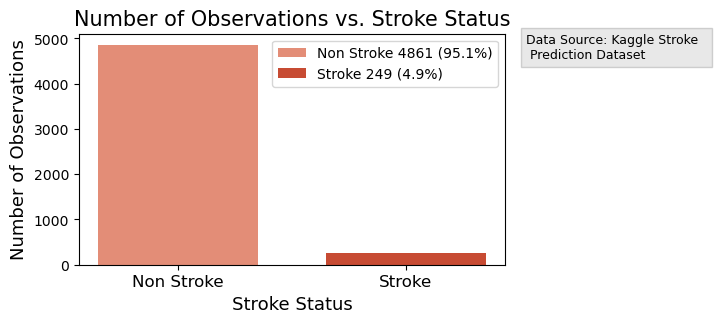

In [4]:
# Graphic 1: Number of Patients vs. Stroke Status

# Count patients in each stroke category (0 = No, 1 = Yes)
sum_stroke = stroke_copy_processed['stroke'].value_counts().sort_index()

# Calculate percentages
total = sum_stroke.sum()
percentages = (sum_stroke / total * 100).round(1)

# Create figure
fig, ax = plt.subplots(figsize=(5.5,3))

# Plot bars
bars = ax.bar(sum_stroke.index, sum_stroke.values,
              color=["#e38d77", "#c74b33"],
              width=0.7)

# Build legend labels with counts + percentages
legend_labels = [
    f'Non Stroke {sum_stroke[0]} ({percentages[0]}%)',
    f'Stroke {sum_stroke[1]} ({percentages[1]}%)'
]

# Attach labels to each bar
for bar, label in zip(bars, legend_labels):
    bar.set_label(label)

# Add legend
ax.legend(loc='upper right')

# Titles and labels
ax.set_title('Number of Observations vs. Stroke Status', fontsize=15)
ax.set_xlabel('Stroke Status', fontsize=13)
ax.set_ylabel('Number of Observations', fontsize=13)
ax.set_xticks([0,1])
ax.set_xticklabels(['Non Stroke','Stroke'], fontsize=12)

# Create text box below plot to indicate data source for data transparency purposes, and to outline bin parameters to provide audience with context
plt.text(
    1.05, 1,  # Text positioning from axes
     'Data Source: Kaggle Stroke  \n Prediction Dataset', # Text - Data Source
    transform=plt.gca().transAxes,  # place relative to entire figure
    fontsize=9,
    color='black',
    ha='left',  # Horizontal text alignment inside box
    va='top',   # Vertical text alignment inside box
    bbox=dict(
        facecolor='lightgrey',   # Light red background,
        alpha=0.5,
        edgecolor='darkgrey',    # Border color
    )
)
plt.show()


In [ ]:
stroke_copy['stroke'].sum()


249

# Tornado chart with matplotlib Stroke vs. Comorbidities: Hypertension and Heart Disease

In [ ]:

# df copy to graph comorbilities in patients with and without stroke: HTA and HD
comorb_df = stroke_copy_processed[['hypertension','heart_disease','stroke']].copy()
comorb_df.head()

## Means HTA and HD

# Step 1: Counts
stroke_yes_total = (comorb_df['stroke'] == 1).sum()
stroke_no_total = (comorb_df['stroke'] == 0).sum()

# Within stroke=1
hta_stroke = ((comorb_df['stroke'] == 1) & (comorb_df['hypertension'] == 1)).sum()
hd_stroke  = ((comorb_df['stroke'] == 1) & (comorb_df['heart_disease'] == 1)).sum()

# Within stroke=0
hta_no_stroke = ((comorb_df['stroke'] == 0) & (comorb_df['hypertension'] == 1)).sum()
hd_no_stroke  = ((comorb_df['stroke'] == 0) & (comorb_df['heart_disease'] == 1)).sum()


# Calculate the mean: 
# Within stroke=1
hta_stroke_mean = (hta_stroke / stroke_yes_total)*100
hd_stroke_mean  = (hd_stroke / stroke_yes_total)*100

# Within stroke=0
hta_no_stroke_mean = (hta_no_stroke / stroke_no_total)*100
hd_no_stroke_mean  = (hd_no_stroke / stroke_no_total)*100

In [ ]:
# Pacientes SIN stroke (HTA y HD)
print("hta_no_stroke_mean:", hta_no_stroke_mean)  # % pacientes sin stroke con hipertensión
print("hd_no_stroke_mean:", hd_no_stroke_mean)    # % pacientes sin stroke con enfermedad cardíaca

# Pacientes CON stroke (HTA y HD)
print("hta_stroke_mean:", hta_stroke_mean)        # % pacientes con stroke con hipertensión
print("hd_stroke_mean:", hd_stroke_mean)          # % pacientes con stroke con enfermedad cardíaca


hta_no_stroke_mean: 8.887060275663444
hd_no_stroke_mean: 4.710964822053076
hta_stroke_mean: 26.506024096385545
hd_stroke_mean: 18.87550200803213


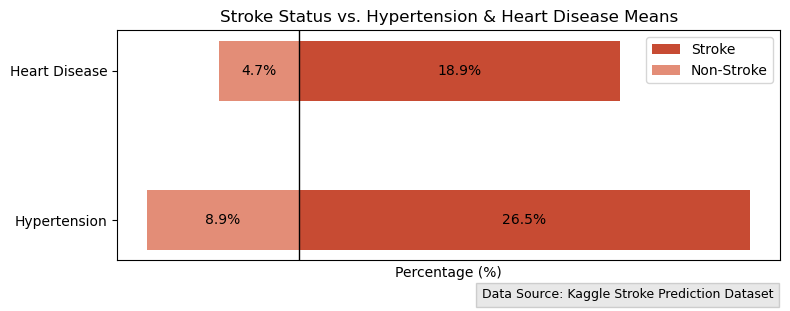

In [ ]:
# Labels
labels = ["Hypertension", "Heart Disease"]

# Values (percentages)
stroke_means = np.array([hta_stroke_mean, hd_stroke_mean])           # Stroke group
non_stroke_means = np.array([hta_no_stroke_mean, hd_no_stroke_mean]) # Non-Stroke group

y_pos = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(8, 3))

bar_height = 0.4  # thickness of bars

# Plot Stroke (right side, positive values)
bars_stroke = ax.barh(y_pos, stroke_means, 
                      height=bar_height, color="#c74b33", label="Stroke", align="center")

# Plot Non-Stroke (left side, but values shifted to negative for plotting)
bars_non_stroke = ax.barh(y_pos, -non_stroke_means, 
                          height=bar_height, color="#e38d77", label="Non-Stroke", align="center")

# Add labels inside bars
for bar in bars_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=10)

for bar in bars_non_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=10)

# Formatting
ax.set_xticks([])
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.set_xlabel("Percentage (%)")
ax.set_title("Stroke Status vs. Hypertension & Heart Disease Means")
ax.axvline(0, color="black", linewidth=1)  # center line
ax.legend(loc="upper right")

plt.tight_layout()

# Create text box below plot to indicate data source for data transparency purposes, and to outline bin parameters to provide audience with context
plt.text(
    0.55, -0.12,  # Text positioning from axes
     'Data Source: Kaggle Stroke Prediction Dataset', # Text - Data Source
    transform=plt.gca().transAxes,  # place relative to entire figure
    fontsize=9,
    color='black',
    ha='left',  # Horizontal text alignment inside box
    va='top',   # Vertical text alignment inside box
    bbox=dict(
        facecolor='lightgrey',   # Light red background,
        alpha=0.5,
        edgecolor='darkgrey',    # Border color
    )
)
plt.show()


# Tornado chart with matplotlib Stroke vs. Risk Factors:  BMI and Smoke Status and Glucosa Category

In [ ]:
# df copy to graph risk factors processed in patients with and without stroke: smoke, BMI and Glucose

risk_f_df = stroke_copy_processed[['avg_glucose_level'	, 'bmi', 'smoking_status', 'stroke']].copy()
risk_f_df.head()

,avg_glucose_level,bmi,smoking_status,stroke
0,228.69,36.600000,formerly smoked,1
1,202.21,34.388889,never smoked,1
2,105.92,32.500000,never smoked,1
3,171.23,34.400000,smokes,1
4,174.12,24.000000,never smoked,1


# to include: BMI total graph without categories

In [ ]:

# Define the bins (boundaries) of x-axis categories
bins = [ 0, 18.5, 25, 30, float('inf')]

# Define the labels for each bin
labels = [ 'Underweight','Healthy Weight', 'Overweight', 'Obesity']

# Create a new column for BMI category type
risk_f_df['bmi_category'] = pd.cut(
    risk_f_df['bmi'],
      bins=bins, 
      labels=labels, 
      right=False)

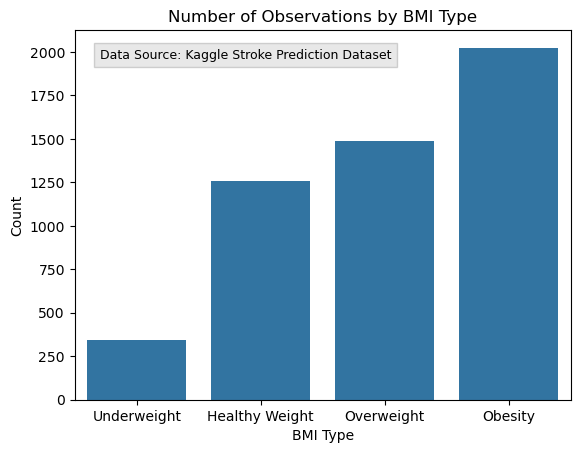

In [ ]:
# Bar Plot for Count of patients by BMI (categories)
sns.countplot(data=risk_f_df, x='bmi_category', order=labels)
plt.title('Number of Observations by BMI Type')
plt.xlabel('BMI Type')
plt.ylabel('Count')

# Create text box below plot to indicate data source for data transparency purposes, and to outline bin parameters to provide audience with context
plt.text(
    0.05, 0.95,  # Text positioning from axes
     'Data Source: Kaggle Stroke Prediction Dataset', # Text - Data Source
    transform=plt.gca().transAxes,  # place relative to entire figure
    fontsize=9,
    color='black',
    ha='left',  # Horizontal text alignment inside box
    va='top',   # Vertical text alignment inside box
    bbox=dict(
        facecolor='lightgrey',   # Light red background,
        alpha=0.5,
        edgecolor='darkgrey',    # Border color
    )
)
plt.show()


In [ ]:
## Means Overweight and Obesity vrs stroke and non stroke


# Step 1: Counts Stroke and non stroke
stroke_yes_total = (risk_f_df['stroke'] == 1).sum()
stroke_no_total = (risk_f_df['stroke'] == 0).sum()

# Within stroke=1
ow_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['bmi_category'] == 'Overweight')).sum()
ob_stroke  = ((risk_f_df['stroke'] == 1) & (risk_f_df['bmi_category'] == 'Obesity')).sum()
hw_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['bmi_category'] == 'Healthy Weight')).sum()
uw_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['bmi_category'] == 'Underweight')).sum()

# Within stroke=0
ow_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['bmi_category'] == 'Overweight')).sum()
ob_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['bmi_category'] == 'Obesity')).sum()
hw_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['bmi_category'] == 'Healthy Weight')).sum()
uw_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['bmi_category'] == 'Underweight')).sum()


# Calculate the mean: 
# Within stroke=1
ow_stroke_mean = (ow_stroke / stroke_yes_total)*100
ob_stroke_mean  = (ob_stroke / stroke_yes_total)*100
hw_stroke_mean  = (hw_stroke / stroke_yes_total)*100
uw_stroke_mean  = (uw_stroke / stroke_yes_total)*100

# Within stroke=0
ow_no_stroke_mean = (ow_no_stroke / stroke_no_total)*100
ob_no_stroke_mean  = (ob_no_stroke / stroke_no_total)*100
hw_no_stroke_mean  = (hw_no_stroke / stroke_no_total)*100
uw_no_stroke_mean  = (uw_no_stroke / stroke_no_total)*100

In [ ]:
print("ow_no_stroke_mean:", ow_no_stroke_mean) # % patients with overweight and non stroke
print("ob_no_stroke_mean:", ob_no_stroke_mean) # % patients with Obesity and non stroke
print("hw_no_stroke_mean:", hw_no_stroke_mean) # % patients with healthy weight and non stroke
print("uw_no_stroke_mean:", uw_no_stroke_mean) # % patients with underweight and non stroke


print("ow_stroke_mean:", ob_stroke_mean) # % patients with Obesity  and  stroke
print("ob_stroke_mean:", ob_stroke_mean) # % patients with Obesity  and  stroke
print("hw_stroke_mean:", hw_stroke_mean) ## % patients with healthy weight and  stroke
print("uw_stroke_mean:", uw_stroke_mean) # % patients with underweight  and  stroke

ow_no_stroke_mean: 28.533223616539804
ob_no_stroke_mean: 39.33347047932524
hw_no_stroke_mean: 25.118288418020985
uw_no_stroke_mean: 7.015017486113968
ow_stroke_mean: 44.97991967871486
ob_stroke_mean: 44.97991967871486
hw_stroke_mean: 14.056224899598394
uw_stroke_mean: 0.8032128514056224


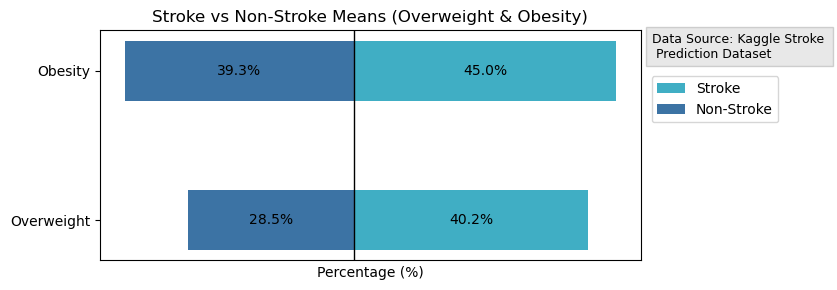

In [ ]:
# Labels
labels = ["Overweight", "Obesity"]

# Values (percentages)
stroke_means = np.array([ow_stroke_mean, ob_stroke_mean])           # Stroke group
non_stroke_means = np.array([ow_no_stroke_mean, ob_no_stroke_mean]) # Non-Stroke group

y_pos = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(8, 3))

bar_height = 0.4  # thickness of bars

# Plot Stroke (right side, positive values)
bars_stroke = ax.barh(y_pos, stroke_means, 
                      height=bar_height, color="#40aec4", label="Stroke", align="center")

# Plot Non-Stroke (left side, values shifted to negative for plotting)
bars_non_stroke = ax.barh(y_pos, -non_stroke_means, 
                          height=bar_height, color="#3c73a4", label="Non-Stroke", align="center")

# Add labels inside bars
for bar in bars_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=10)

for bar in bars_non_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=10)

# Formatting
ax.set_xticks([])
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.set_xlabel("Percentage (%)")
ax.set_title("Stroke vs Non-Stroke Means (Overweight & Obesity)")
ax.axvline(0, color="black", linewidth=1)  # center line
ax.legend(
    loc="upper left",
    bbox_to_anchor=(1.02, 0.8),  # move it outside to the right
    borderaxespad=0
)


plt.tight_layout()

# Create text box below plot to indicate data source for data transparency purposes, and to outline bin parameters to provide audience with context
plt.text(
    1.02, 0.99,  # Text positioning from axes
     'Data Source: Kaggle Stroke \n Prediction Dataset', # Text - Data Source
    transform=plt.gca().transAxes,  # place relative to entire figure
    fontsize=9,
    color='black',
    ha='left',  # Horizontal text alignment inside box
    va='top',   # Vertical text alignment inside box
    bbox=dict(
        facecolor='lightgrey',   # Light red background,
        alpha=0.5,
        edgecolor='darkgrey',    # Border color
    )
)
plt.show()


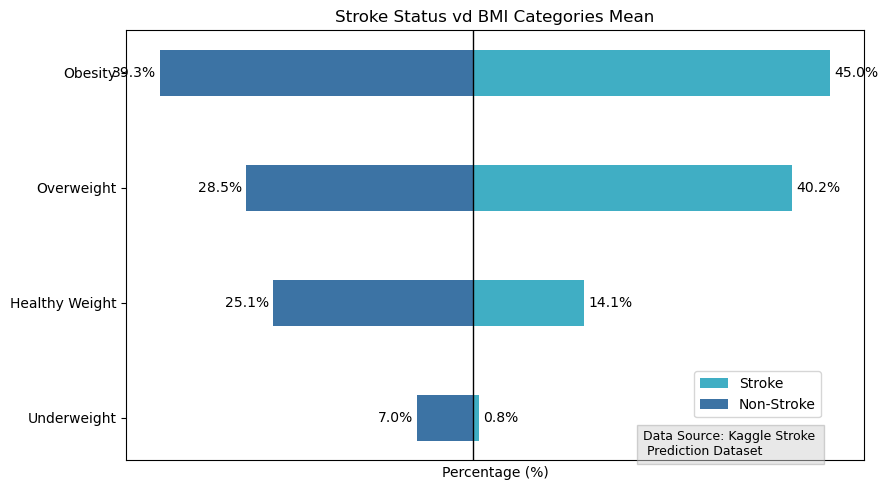

In [ ]:
# Labels
labels = ["Underweight", "Healthy Weight", "Overweight", "Obesity"]

# Values (percentages)
stroke_means = np.array([uw_stroke_mean, hw_stroke_mean, ow_stroke_mean, ob_stroke_mean])           # Stroke group
non_stroke_means = np.array([uw_no_stroke_mean, hw_no_stroke_mean, ow_no_stroke_mean, ob_no_stroke_mean]) # Non-Stroke group

y_pos = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(9, 5))

bar_height = 0.4  # thickness of bars

# Plot Stroke (right side, positive values)
bars_stroke = ax.barh(y_pos, stroke_means, 
                      height=bar_height, color="#40aec4", label="Stroke", align="center")

# Plot Non-Stroke (left side, values shifted to negative for plotting)
bars_non_stroke = ax.barh(y_pos, -non_stroke_means, 
                          height=bar_height, color="#3c73a4", label="Non-Stroke", align="center")

# Add labels OUTSIDE bars (to the front)
for bar in bars_stroke:
    width = bar.get_width()
    ax.text(width + 0.5,                      # place label slightly to the right of the bar
            bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="left", va="center", color="black", fontsize=10)

for bar in bars_non_stroke:
    width = bar.get_width()
    ax.text(width - 0.5,                      # place label slightly to the left of the bar
            bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="right", va="center", color="black", fontsize=10)

# Formatting
ax.set_xticks([])
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.set_xlabel("Percentage (%)")
ax.set_title("Stroke Status vd BMI Categories Mean")
ax.axvline(0, color="black", linewidth=1)  # center line
ax.legend(
    loc="lower left",
    bbox_to_anchor=(0.77, 0.1),  # move it outside to the right
    borderaxespad=0
)

plt.tight_layout()
plt.text(
    0.7, 0.07,  # Text positioning from axes
     'Data Source: Kaggle Stroke \n Prediction Dataset', # Text - Data Source
    transform=plt.gca().transAxes,  # place relative to entire figure
    fontsize=9,
    color='black',
    ha='left',  # Horizontal text alignment inside box
    va='top',   # Vertical text alignment inside box
    bbox=dict(
        facecolor='lightgrey',   # Light red background,
        alpha=0.5,
        edgecolor='darkgrey',    # Border color
    )
)
plt.show()

# Smoke Categories

In [ ]:
## Means smoking status vrs stroke and non stroke


# Step 1: Counts Stroke and non stroke
stroke_yes_total = (risk_f_df['stroke'] == 1).sum()
stroke_no_total = (risk_f_df['stroke'] == 0).sum()

# Within stroke=1
f_smk_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['smoking_status'] == 'formerly smoked')).sum()
smk_stroke  = ((risk_f_df['stroke'] == 1) & (risk_f_df['smoking_status'] == 'smokes')).sum()
n_smk_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['smoking_status'] == 'never smoked')).sum()
unk_smk_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['smoking_status'] == 'Unknown')).sum()

# Within stroke=0
f_smk_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['smoking_status'] == 'formerly smoked')).sum()
smk_no_stroke   = ((risk_f_df['stroke'] == 0) & (risk_f_df['smoking_status'] == 'smokes')).sum()  
n_smk_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['smoking_status'] == 'never smoked')).sum()
unk_smk_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['smoking_status'] == 'Unknown')).sum()

# Calculate the mean: 
# Within stroke=1
f_smk_stroke_mean = (f_smk_stroke / stroke_yes_total)*100
smk_stroke_mean  = (smk_stroke / stroke_yes_total)*100
n_smk_stroke_mean  = (n_smk_stroke / stroke_yes_total)*100
unk_smk_stroke_mean  = (unk_smk_stroke / stroke_yes_total)*100

# Within stroke=0
f_smk_no_stroke_mean = (f_smk_no_stroke / stroke_no_total)*100
smk_no_stroke_mean  = (smk_no_stroke / stroke_no_total)*100
n_smk_no_stroke_mean  = (n_smk_no_stroke / stroke_no_total)*100
unk_smk_no_stroke_mean  = (unk_smk_no_stroke / stroke_no_total)*100

In [ ]:
print("f_smk_no_stroke_mean:", f_smk_no_stroke_mean) # % patients formerly smoked and non stroke
print("smk_no_stroke_mean:", smk_no_stroke_mean) # % patients smoker and non stroke
print("n_smk_no_stroke_mean:", n_smk_no_stroke_mean) # % patients never smoker and non stroke
print("unk_smk_no_stroke_mean:", unk_smk_no_stroke_mean) # % patients Unknown and non stroke


print("f_smk_stroke_mean:", f_smk_stroke_mean) # % patients formerly smoked  and  stroke
print("smk_stroke_mean:", smk_stroke_mean) # % patients smoker  and  stroke
print("n_smk_stroke_mean:", n_smk_stroke_mean) ## % patients never smoker and  stroke
print("unk_smk_stroke_mean:", unk_smk_stroke_mean) # % patients Unknown  and  stroke

f_smk_no_stroke_mean: 16.766097510800247
smk_no_stroke_mean: 15.367208393334705
n_smk_no_stroke_mean: 37.07056161283687
unk_smk_no_stroke_mean: 30.79613248302818
f_smk_stroke_mean: 28.11244979919679
smk_stroke_mean: 16.867469879518072
n_smk_stroke_mean: 36.144578313253014
unk_smk_stroke_mean: 18.87550200803213


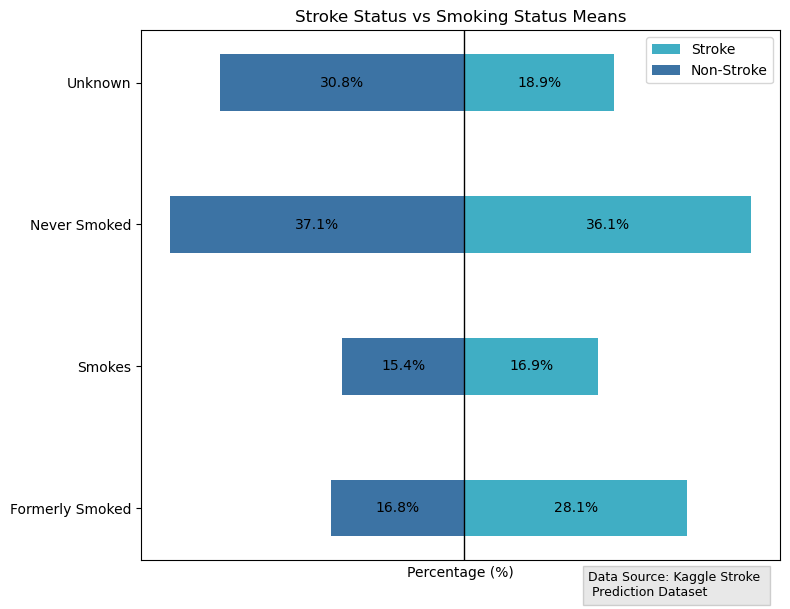

In [ ]:
# Labels
labels = ["Formerly Smoked", "Smokes", "Never Smoked", "Unknown"]

# Values (percentages)
stroke_means = np.array([
    f_smk_stroke_mean,
    smk_stroke_mean,
    n_smk_stroke_mean,
    unk_smk_stroke_mean
])  # Stroke group

non_stroke_means = np.array([
    f_smk_no_stroke_mean,
    smk_no_stroke_mean,
    n_smk_no_stroke_mean,
    unk_smk_no_stroke_mean
])  # Non-Stroke group

y_pos = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(8, 6))

bar_height = 0.4  # thickness of bars

# Plot Stroke (right side, positive values)
bars_stroke = ax.barh(y_pos, stroke_means,
                      height=bar_height, color="#40aec4", label="Stroke", align="center")

# Plot Non-Stroke (left side, values shifted to negative for plotting)
bars_non_stroke = ax.barh(y_pos, -non_stroke_means,
                          height=bar_height, color="#3c73a4", label="Non-Stroke", align="center")

# Add labels inside bars
for bar in bars_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=10)

for bar in bars_non_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=10)

# Formatting
ax.set_xticks([])
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.set_xlabel("Percentage (%)")
ax.set_title("Stroke Status vs Smoking Status Means")
ax.axvline(0, color="black", linewidth=1)  # center line
ax.legend(loc="upper right")

plt.tight_layout()
plt.text(
    0.7, -0.02,  # Text positioning from axes
     'Data Source: Kaggle Stroke \n Prediction Dataset', # Text - Data Source
    transform=plt.gca().transAxes,  # place relative to entire figure
    fontsize=9,
    color='black',
    ha='left',  # Horizontal text alignment inside box
    va='top',   # Vertical text alignment inside box
    bbox=dict(
        facecolor='lightgrey',   # Light red background,
        alpha=0.5,
        edgecolor='darkgrey',    # Border color
    )
)
plt.show()

## GLucose Average Cathegory

DM: more than 200mg/dl
Pre Diabetic between 140 and 199 mg/dl
Healthy Glucosa Average: 70 to 139mg/dl
Low: less tan 70

In [ ]:
# Define the bins (boundaries) of x-axis categories
bins = [0, 70, 140, 200, float('inf')]

# Define the labels for each bin
labels = ['Low', 'Healthy', 'Pre-Diabetic', 'Diabetic']

# Create a new column for glucose categories
risk_f_df['glucose_category'] = pd.cut(
    risk_f_df['avg_glucose_level'],
    bins=bins,
    labels=labels,
    right=False
)

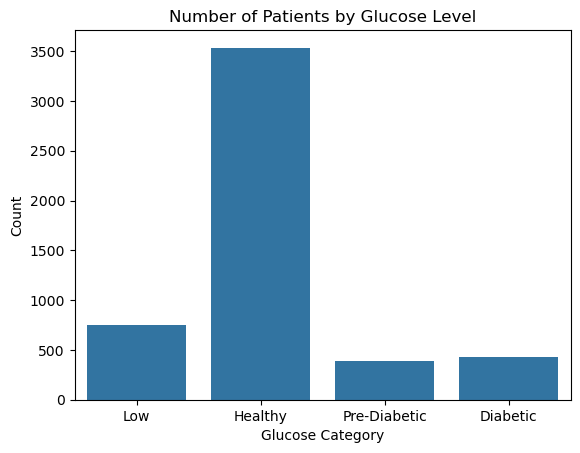

In [ ]:
# Bar Plot for Count of patients by Glucose Level (categories)

sns.countplot(data=risk_f_df, x='glucose_category', order=labels)
plt.title('Number of Patients by Glucose Level')
plt.xlabel('Glucose Category')
plt.ylabel('Count')
plt.show()

In [ ]:
## Means glucosa average per category vrs stroke and non stroke


# Step 1: Counts Stroke and non stroke
stroke_yes_total = (risk_f_df['stroke'] == 1).sum()
stroke_no_total = (risk_f_df['stroke'] == 0).sum()

# Within stroke=1
dm_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['glucose_category'] == 'Diabetic')).sum()
p_dm_stroke  = ((risk_f_df['stroke'] == 1) & (risk_f_df['glucose_category'] == 'Pre-Diabetic')).sum()
h_gav_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['glucose_category'] == 'Healthy')).sum()
l_gav_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['glucose_category'] == 'Low')).sum()

# Within stroke=0
dm_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['glucose_category'] == 'Diabetic')).sum()
p_dm_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['glucose_category'] == 'Pre-Diabetic')).sum()
h_gav_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['glucose_category'] == 'Healthy')).sum()
l_gav_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['glucose_category'] == 'Low')).sum()


# Calculate the mean: 
# Within stroke=1
dm_stroke_mean = (dm_stroke / stroke_yes_total)*100
p_dm_stroke_mean  = (p_dm_stroke / stroke_yes_total)*100
h_gav_stroke_mean  = (h_gav_stroke / stroke_yes_total)*100
l_gav_stroke_mean  = (l_gav_stroke / stroke_yes_total)*100

# Within stroke=0
dm_no_stroke_mean = (dm_no_stroke / stroke_no_total)*100
p_dm_no_stroke_mean  = (p_dm_no_stroke / stroke_no_total)*100
h_gav_no_stroke_mean  = (h_gav_no_stroke / stroke_no_total)*100
l_gav_no_stroke_mean  = (l_gav_no_stroke / stroke_no_total)*100

In [ ]:
print("dm_no_stroke_mean:", dm_no_stroke_mean) # % patients with diabetes mellitus and non stroke
print("p_dm_no_stroke_mean:", p_dm_no_stroke_mean) # % patients with pre diabetes and non stroke
print("h_gav_no_stroke_mean:", h_gav_no_stroke_mean) # % patients with healthy glucose average weight and non stroke
print("l_gav_no_stroke_mean:", l_gav_no_stroke_mean) # % patients with low glucose average and non stroke


print("dm_stroke_mean:", dm_stroke_mean) # % patients with diabetes mellitus  and  stroke
print("p_dm_stroke_mean:", p_dm_stroke_mean) # % patients with pre-diabetes  and  stroke
print("h_gav_stroke_mean:", h_gav_stroke_mean) ## % patients with healthy glucose average and  stroke
print("l_gav_stroke_mean:", l_gav_stroke_mean) # % patients with low glucose average  and  stroke

dm_no_stroke_mean: 7.776177741205513
p_dm_no_stroke_mean: 7.20016457519029
h_gav_no_stroke_mean: 70.06788726599466
l_gav_no_stroke_mean: 14.955770417609546
dm_stroke_mean: 22.48995983935743
p_dm_stroke_mean: 14.859437751004014
h_gav_stroke_mean: 51.80722891566265
l_gav_stroke_mean: 10.843373493975903


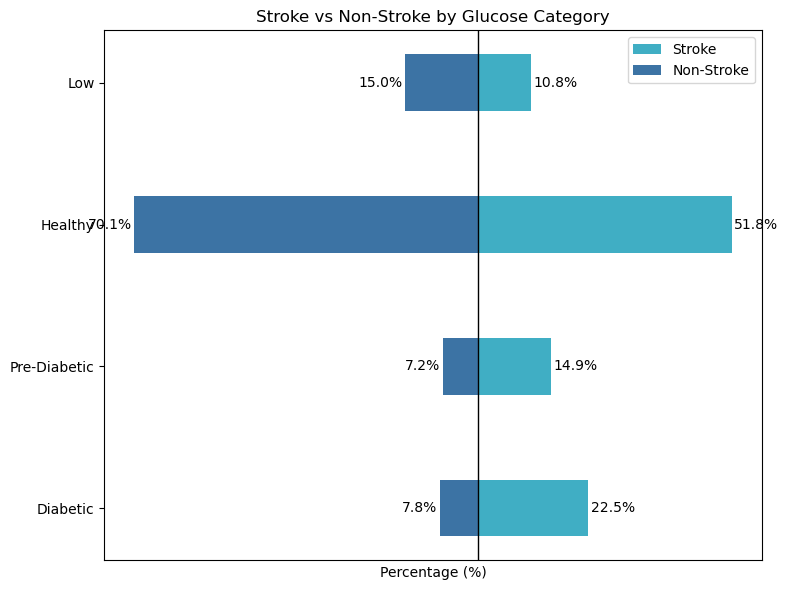

In [ ]:
# Step 1: Counts Stroke and Non-Stroke
stroke_yes_total = (risk_f_df['stroke'] == 1).sum()
stroke_no_total  = (risk_f_df['stroke'] == 0).sum()

# Step 2: Counts by glucose_category within stroke=1
dm_stroke   = ((risk_f_df['stroke'] == 1) & (risk_f_df['glucose_category'] == 'Diabetic')).sum()
p_dm_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['glucose_category'] == 'Pre-Diabetic')).sum()
h_gav_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['glucose_category'] == 'Healthy')).sum()
l_gav_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['glucose_category'] == 'Low')).sum()

# Step 3: Counts by glucose_category within stroke=0
dm_no_stroke   = ((risk_f_df['stroke'] == 0) & (risk_f_df['glucose_category'] == 'Diabetic')).sum()
p_dm_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['glucose_category'] == 'Pre-Diabetic')).sum()
h_gav_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['glucose_category'] == 'Healthy')).sum()
l_gav_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['glucose_category'] == 'Low')).sum()

# Step 4: Calculate percentages
# Stroke group
dm_stroke_mean   = (dm_stroke / stroke_yes_total) * 100
p_dm_stroke_mean = (p_dm_stroke / stroke_yes_total) * 100
h_gav_stroke_mean = (h_gav_stroke / stroke_yes_total) * 100
l_gav_stroke_mean = (l_gav_stroke / stroke_yes_total) * 100

# Non-Stroke group
dm_no_stroke_mean   = (dm_no_stroke / stroke_no_total) * 100
p_dm_no_stroke_mean = (p_dm_no_stroke / stroke_no_total) * 100
h_gav_no_stroke_mean = (h_gav_no_stroke / stroke_no_total) * 100
l_gav_no_stroke_mean = (l_gav_no_stroke / stroke_no_total) * 100

# Step 5: Labels and values
labels = ["Diabetic", "Pre-Diabetic", "Healthy", "Low"]

stroke_means     = np.array([dm_stroke_mean, p_dm_stroke_mean, h_gav_stroke_mean, l_gav_stroke_mean])
non_stroke_means = np.array([dm_no_stroke_mean, p_dm_no_stroke_mean, h_gav_no_stroke_mean, l_gav_no_stroke_mean])

y_pos = np.arange(len(labels))
bar_height = 0.4

# Step 6: Plot
fig, ax = plt.subplots(figsize=(8, 6))

# Stroke bars (positive side)
bars_stroke = ax.barh(y_pos, stroke_means,
                      height=bar_height, color="#40aec4", label="Stroke", align="center")

# Non-Stroke bars (negative side)
bars_non_stroke = ax.barh(y_pos, -non_stroke_means,
                          height=bar_height, color="#3c73a4", label="Non-Stroke", align="center")

# Step 7: Add labels outside bars
for bar in bars_stroke:
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="left", va="center", color="black", fontsize=10)

for bar in bars_non_stroke:
    width = bar.get_width()
    ax.text(width - 0.5, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="right", va="center", color="black", fontsize=10)

# Step 8: Formatting
ax.set_xticks([])
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.set_xlabel("Percentage (%)")
ax.set_title("Stroke vs Non-Stroke by Glucose Category")
ax.axvline(0, color="black", linewidth=1)  # center line
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()


In [ ]:
# Data exploration with_stroke only

with_stroke = stroke.copy() # Dataset copy of observations with stroke to be used for data correlation. 
with_stroke.drop(['id'], axis=1, inplace=True)
with_stroke=  with_stroke[with_stroke['stroke']==1]
with_stroke


,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
244,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
247,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,NaN,Unknown,1


work_type 'Private', 'Self-employed', 'Private', 'children', '
residence_type


# Data Exploration Demographic Variables: gender, age, ever_married, work_type, residence_type vs. stroke

In [ ]:
# df copy to graph demograpic variables processed in patients with and without stroke: gender, age, ever_married, work_type, residence_type vs. stroke

dem_var_df = stroke_copy_processed[['gender', 'age', 'ever_married', 'work_type', 'residence_type', 'stroke']].copy()
dem_var_df .head()

,gender,age,ever_married,work_type,residence_type,stroke
0,Male,67.0,Yes,Private,Urban,1
1,Female,61.0,Yes,Self-employed,Rural,1
2,Male,80.0,Yes,Private,Rural,1
3,Female,49.0,Yes,Private,Urban,1
4,Female,79.0,Yes,Self-employed,Rural,1


## Gender

In [ ]:
## Gender vrs Stroke Status

# Step 1: Counts
stroke_yes_total = (dem_var_df ['stroke'] == 1).sum()
stroke_no_total = (dem_var_df ['stroke'] == 0).sum()

# Within stroke=1
fem_stroke = ((dem_var_df['stroke'] == 1) & (dem_var_df['gender'] == 'Female')).sum()
mal_stroke  = ((dem_var_df['stroke'] == 1) & (dem_var_df['gender'] == 'Male')).sum()

# Within stroke=0
fem_no_stroke = ((dem_var_df['stroke'] == 0) & (dem_var_df['gender'] == 'Female')).sum()
mal_no_stroke  = ((dem_var_df['stroke'] == 0) & (dem_var_df['gender'] == 'Male')).sum()


# Calculate the mean: 
# Within stroke=1
fem_stroke_mean = (fem_stroke / stroke_yes_total)*100
mal_stroke_mean  = (mal_stroke / stroke_yes_total)*100

# Within stroke=0
fem_no_stroke_mean = (fem_no_stroke / stroke_no_total)*100
mal_no_stroke_mean  = (mal_no_stroke / stroke_no_total)*100

In [ ]:
print("fem_no_stroke_mean:", fem_no_stroke_mean) # % female patients without  stroke
print("mal_no_stroke_mean:", mal_no_stroke_mean) # % male patients without stroke



print("fem_stroke_mean:", fem_stroke_mean) # % female patients with stroke
print("mal_stroke_mean:", mal_stroke_mean) # % male patients with stroke


fem_no_stroke_mean: 58.69162723719399
mal_no_stroke_mean: 41.287800864019744
fem_stroke_mean: 56.62650602409639
mal_stroke_mean: 43.373493975903614


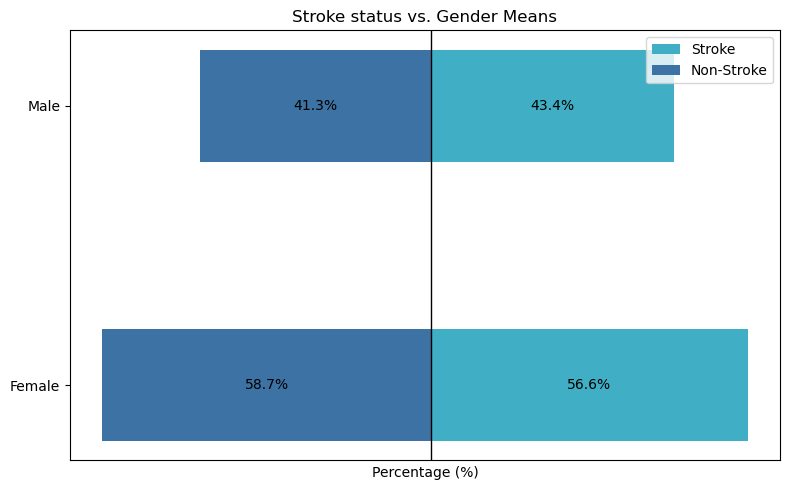

In [ ]:
# Labels
labels = ["Female", "Male"]

# Values (percentages)
stroke_means = np.array([fem_stroke_mean, mal_stroke_mean])           # Stroke group
non_stroke_means = np.array([fem_no_stroke_mean, mal_no_stroke_mean]) # Non-Stroke group

y_pos = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(8, 5))

bar_height = 0.4  # thickness of bars

# Plot Stroke (right side, positive values)
bars_stroke = ax.barh(y_pos, stroke_means, 
                      height=bar_height, color="#40aec4", label="Stroke", align="center")

# Plot Non-Stroke (left side, negative values for plotting)
bars_non_stroke = ax.barh(y_pos, -non_stroke_means, 
                          height=bar_height, color="#3c73a4", label="Non-Stroke", align="center")

# Add labels inside bars
for bar in bars_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=10)

for bar in bars_non_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=10)

# Formatting
ax.set_xticks([])
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.set_xlabel("Percentage (%)")
ax.set_title("Stroke status vs. Gender Means")
ax.axvline(0, color="black", linewidth=1)  # center line
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()


## Age

In [ ]:
# Define the bins (boundaries) of x-axis categories
bins = [0, 14, 25, 65, float('inf')]

# Define the labels for each bin
labels = ['Children', 'Youth', 'Adult', 'Senior']

# Create a new column for age categories
dem_var_df['age_category'] = pd.cut(
    dem_var_df['age'],
    bins=bins,
    labels=labels,
    right=False
)

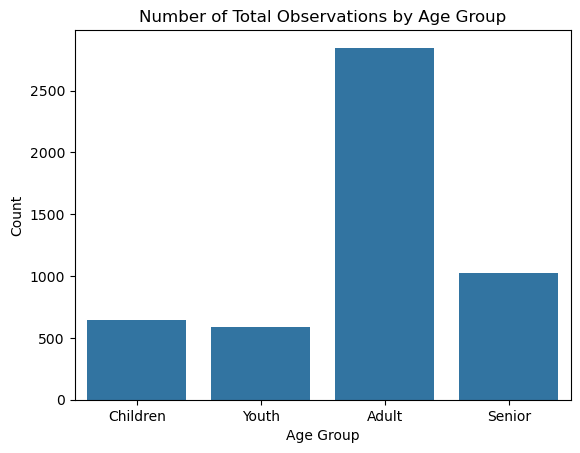

In [ ]:
# Bar Plot for Count of total observations by Age (categories)

sns.countplot(data=dem_var_df, x='age_category', order=labels)
plt.title('Number of Total Observations by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

'

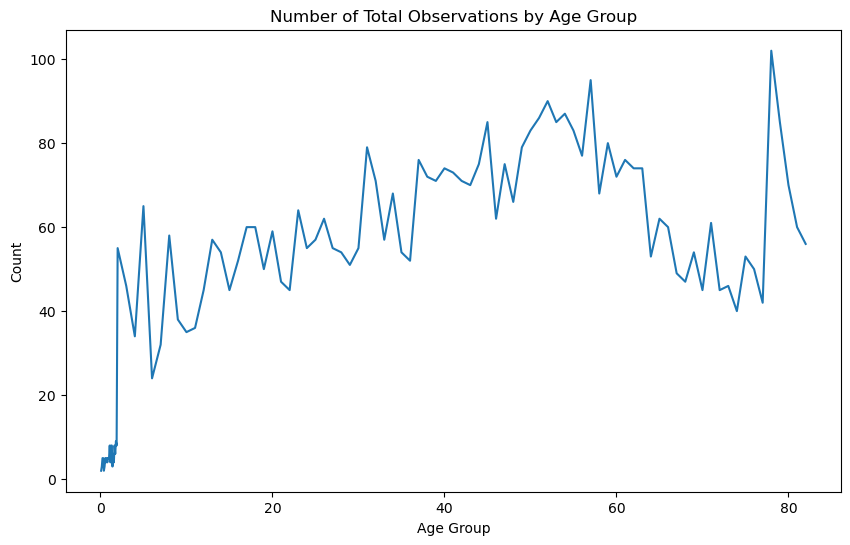

In [ ]:
# Count Total Observations by age
age_counts = dem_var_df['age'].value_counts().sort_index()

# Bar Plot for Count of total observations  by age
age_counts.plot(kind='line', figsize=(10,6))
plt.title('Number of Total Observations by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# include comparative graph: age vrs. stroke and non stroke

In [ ]:
# ['Children', 'Youth', 'Adult', 'Senior']

In [ ]:
## Age vrs Stroke Status
# age_category: ['Children', 'Youth', 'Adult', 'Senior']


# Step 1: Counts
stroke_yes_total = (dem_var_df ['stroke'] == 1).sum()
stroke_no_total = (dem_var_df ['stroke'] == 0).sum()

# Within stroke=1
sen_stroke = ((dem_var_df['stroke'] == 1) & (dem_var_df['age_category'] == 'Senior')).sum()
adu_stroke  = ((dem_var_df['stroke'] == 1) & (dem_var_df['age_category'] == 'Adult')).sum()
yth_stroke = ((dem_var_df['stroke'] == 1) & (dem_var_df['age_category'] == 'Youth')).sum()
chld_stroke  = ((dem_var_df['stroke'] == 1) & (dem_var_df['age_category'] == 'Children')).sum()

# Within stroke=0
sen_no_stroke = ((dem_var_df['stroke'] == 0) & (dem_var_df['age_category'] == 'Senior')).sum()
adu_no_stroke  = ((dem_var_df['stroke'] == 0) & (dem_var_df['age_category'] == 'Adult')).sum()
yth_no_stroke = ((dem_var_df['stroke'] == 0) & (dem_var_df['age_category'] == 'Youth')).sum()
chld_no_stroke  = ((dem_var_df['stroke'] == 0) & (dem_var_df['age_category'] == 'Children')).sum()

# Calculate the mean: 
# Within stroke=1
sen_stroke_mean = (sen_stroke / stroke_yes_total)*100
adu_stroke_mean  = (adu_stroke / stroke_yes_total)*100
yth_stroke_mean = (yth_stroke / stroke_yes_total)*100
chld_stroke_mean  = (chld_stroke / stroke_yes_total)*100

# Within stroke=0
sen_no_stroke_mean = (sen_no_stroke / stroke_no_total)*100
adu_no_stroke_mean  = (adu_no_stroke / stroke_no_total)*100
yth_no_stroke_mean = (yth_no_stroke / stroke_no_total)*100
chld_no_stroke_mean  = (chld_no_stroke / stroke_no_total)*100

In [ ]:
# Pacientes SIN stroke (por categoría de edad)
print("sen_no_stroke_mean:", sen_no_stroke_mean)   # % pacientes sin stroke que son Senior
print("adu_no_stroke_mean:", adu_no_stroke_mean)   # % pacientes sin stroke que son Adult
print("yth_no_stroke_mean:", yth_no_stroke_mean)   # % pacientes sin stroke que son Youth
print("chld_no_stroke_mean:", chld_no_stroke_mean) # % pacientes sin stroke que son Children

# Pacientes CON stroke (por categoría de edad)
print("sen_stroke_mean:", sen_stroke_mean)   # % pacientes con stroke que son Senior
print("adu_stroke_mean:", adu_stroke_mean)   # % pacientes con stroke que son Adult
print("yth_stroke_mean:", yth_stroke_mean)   # % pacientes con stroke que son Youth
print("chld_stroke_mean:", chld_stroke_mean) # % pacientes con stroke que son Children


sen_no_stroke_mean: 17.85640814647192
adu_no_stroke_mean: 56.75786875128574
yth_no_stroke_mean: 12.137420283892203
chld_no_stroke_mean: 13.248302818350133
sen_stroke_mean: 63.85542168674698
adu_stroke_mean: 35.34136546184739
yth_stroke_mean: 0.4016064257028112
chld_stroke_mean: 0.4016064257028112


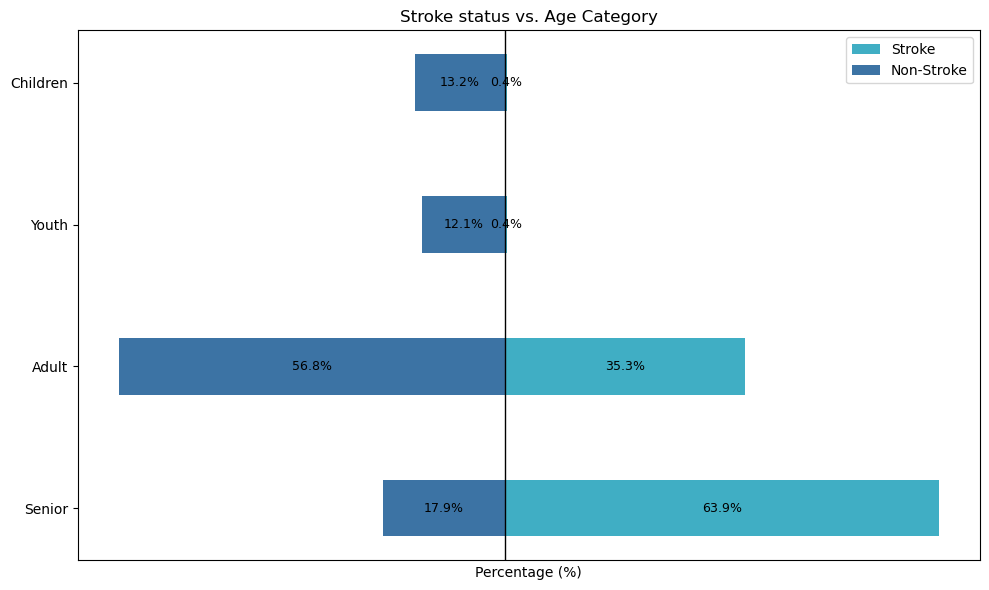

In [ ]:
# Labels
labels = ["Senior", "Adult", "Youth", "Children"]

# Values (percentages)
stroke_means = np.array([
    sen_stroke_mean, 
    adu_stroke_mean, 
    yth_stroke_mean, 
    chld_stroke_mean
])  # Stroke group

non_stroke_means = np.array([
    sen_no_stroke_mean, 
    adu_no_stroke_mean, 
    yth_no_stroke_mean, 
    chld_no_stroke_mean
])  # Non-Stroke group

y_pos = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(10, 6))

bar_height = 0.4  # thickness of bars

# Plot Stroke (right side, positive values)
bars_stroke = ax.barh(y_pos, stroke_means, 
                      height=bar_height, color="#40aec4", label="Stroke", align="center")

# Plot Non-Stroke (left side, negative values for plotting)
bars_non_stroke = ax.barh(y_pos, -non_stroke_means, 
                          height=bar_height, color="#3c73a4", label="Non-Stroke", align="center")

# Add labels inside bars
for bar in bars_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=9)

for bar in bars_non_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=9)

# Formatting
ax.set_xticks([])
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.set_xlabel("Percentage (%)")
ax.set_title("Stroke status vs. Age Category")
ax.axvline(0, color="black", linewidth=1)  # center line
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()


# Ever married

In [ ]:
## Marital Status Vs. Stroke Status

# change categorical value gender to numerical value.

# Step 1: Counts
stroke_yes_total = (dem_var_df ['stroke'] == 1).sum()
stroke_no_total = (dem_var_df ['stroke'] == 0).sum()

# Within stroke=1
e_mar_stroke = ((dem_var_df['stroke'] == 1) & (dem_var_df['ever_married'] == 'Yes')).sum()
n_mar_stroke  = ((dem_var_df['stroke'] == 1) & (dem_var_df['ever_married'] == 'No')).sum()

# Within stroke=0
e_mar_no_stroke = ((dem_var_df['stroke'] == 0) & (dem_var_df['ever_married'] == 'Yes')).sum()
n_mar_no_stroke  = ((dem_var_df['stroke'] == 0) & (dem_var_df['ever_married'] == 'No')).sum()


# Calculate the mean: 
# Within stroke=1
e_mar_stroke_mean = (e_mar_stroke / stroke_yes_total)*100
n_mar_stroke_mean  = (n_mar_stroke / stroke_yes_total)*100

# Within stroke=0
e_mar_no_stroke_mean = (e_mar_no_stroke / stroke_no_total)*100
n_mar_no_stroke_mean  = (n_mar_no_stroke / stroke_no_total)*100

In [ ]:
print("e_mar_no_stroke_mean:", e_mar_no_stroke_mean) # %  patients without  stroke who was ever married
print("n_mar_no_stroke_mean:", n_mar_no_stroke_mean) # %  patients without stroke who never was married



print("e_mar_stroke_mean:", e_mar_stroke_mean) # %  patients with stroke who was ever married
print("n_mar_stroke_mean:", n_mar_stroke_mean) # %  patients with stroke who never was married

e_mar_no_stroke_mean: 64.45175889734622
n_mar_no_stroke_mean: 35.548241102653776
e_mar_stroke_mean: 88.35341365461848
n_mar_stroke_mean: 11.646586345381527


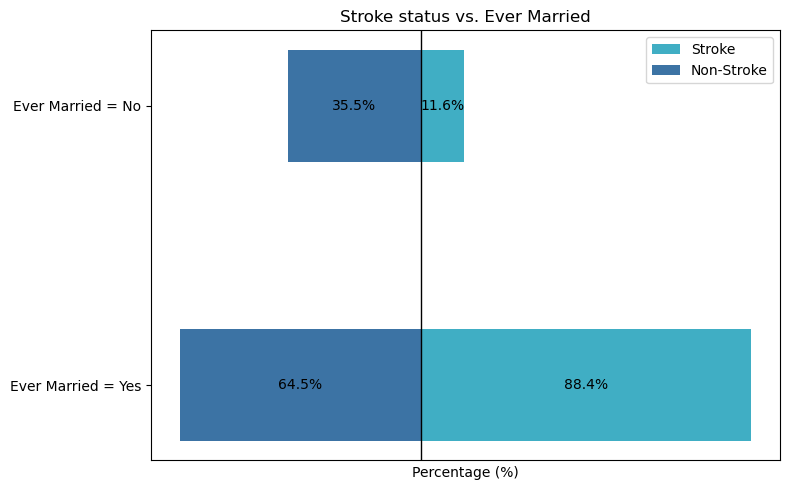

In [ ]:

# Labels
labels = ["Ever Married = Yes", "Ever Married = No"]

# Values (percentages)
stroke_means = np.array([e_mar_stroke_mean, n_mar_stroke_mean])           # Stroke group
non_stroke_means = np.array([e_mar_no_stroke_mean, n_mar_no_stroke_mean]) # Non-Stroke group

y_pos = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(8, 5))

bar_height = 0.4  # thickness of bars

# Plot Stroke (right side, positive values)
bars_stroke = ax.barh(y_pos, stroke_means, 
                      height=bar_height, color="#40aec4", label="Stroke", align="center")

# Plot Non-Stroke (left side, negative values for plotting)
bars_non_stroke = ax.barh(y_pos, -non_stroke_means, 
                          height=bar_height, color="#3c73a4", label="Non-Stroke", align="center")

# Add labels inside bars
for bar in bars_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=10)

for bar in bars_non_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=10)

# Formatting
ax.set_xticks([])
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.set_xlabel("Percentage (%)")
ax.set_title("Stroke status vs. Ever Married")
ax.axvline(0, color="black", linewidth=1)  # center line
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()


## to review: correlation of stroke, married status and age. 

## Work Type

In [ ]:
## Work Type vrs Stroke Status: ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']

# Step 1: Counts
stroke_yes_total = (dem_var_df['stroke'] == 1).sum()
stroke_no_total  = (dem_var_df['stroke'] == 0).sum()

# Within stroke=1
pri_w_stroke   = ((dem_var_df['stroke'] == 1) & (dem_var_df['work_type'] == 'Private')).sum()
slf_emp_stroke = ((dem_var_df['stroke'] == 1) & (dem_var_df['work_type'] == 'Self-employed')).sum()
gov_job_stroke = ((dem_var_df['stroke'] == 1) & (dem_var_df['work_type'] == 'Govt_job')).sum()
chil_stroke    = ((dem_var_df['stroke'] == 1) & (dem_var_df['work_type'] == 'children')).sum()
nev_w_stroke   = ((dem_var_df['stroke'] == 1) & (dem_var_df['work_type'] == 'Never_worked')).sum()

# Within stroke=0
pri_w_no_stroke   = ((dem_var_df['stroke'] == 0) & (dem_var_df['work_type'] == 'Private')).sum()
slf_emp_no_stroke = ((dem_var_df['stroke'] == 0) & (dem_var_df['work_type'] == 'Self-employed')).sum()
gov_job_no_stroke = ((dem_var_df['stroke'] == 0) & (dem_var_df['work_type'] == 'Govt_job')).sum()
chil_no_stroke    = ((dem_var_df['stroke'] == 0) & (dem_var_df['work_type'] == 'children')).sum()
nev_w_no_stroke   = ((dem_var_df['stroke'] == 0) & (dem_var_df['work_type'] == 'Never_worked')).sum()

# Calculate the mean: 
# Within stroke=1
pri_w_stroke_mean   = (pri_w_stroke / stroke_yes_total) * 100
slf_emp_stroke_mean = (slf_emp_stroke / stroke_yes_total) * 100
gov_job_stroke_mean = (gov_job_stroke / stroke_yes_total) * 100
chil_stroke_mean    = (chil_stroke / stroke_yes_total) * 100
nev_w_stroke_mean   = (nev_w_stroke / stroke_yes_total) * 100

# Within stroke=0
pri_w_no_stroke_mean   = (pri_w_no_stroke / stroke_no_total) * 100
slf_emp_no_stroke_mean = (slf_emp_no_stroke / stroke_no_total) * 100
gov_job_no_stroke_mean = (gov_job_no_stroke / stroke_no_total) * 100
chil_no_stroke_mean    = (chil_no_stroke / stroke_no_total) * 100
nev_w_no_stroke_mean   = (nev_w_no_stroke / stroke_no_total) * 100


In [ ]:
# Pacientes SIN stroke (por tipo de trabajo)
print("pri_w_no_stroke_mean:", pri_w_no_stroke_mean)     # % pacientes sin stroke en trabajo privado
print("slf_emp_no_stroke_mean:", slf_emp_no_stroke_mean) # % pacientes sin stroke en trabajo independiente
print("gov_job_no_stroke_mean:", gov_job_no_stroke_mean) # % pacientes sin stroke en empleo gubernamental
print("chil_no_stroke_mean:", chil_no_stroke_mean)       # % pacientes sin stroke en categoría children
print("nev_w_no_stroke_mean:", nev_w_no_stroke_mean)     # % pacientes sin stroke que nunca trabajaron

# Pacientes CON stroke (por tipo de trabajo)
print("pri_w_stroke_mean:", pri_w_stroke_mean)     # % pacientes con stroke en trabajo privado
print("slf_emp_stroke_mean:", slf_emp_stroke_mean) # % pacientes con stroke en trabajo independiente
print("gov_job_stroke_mean:", gov_job_stroke_mean) # % pacientes con stroke en empleo gubernamental
print("chil_stroke_mean:", chil_stroke_mean)       # % pacientes con stroke en categoría children
print("nev_w_stroke_mean:", nev_w_stroke_mean)     # % pacientes con stroke que nunca trabajaron


pri_w_no_stroke_mean: 57.10759103065213
slf_emp_no_stroke_mean: 15.51121168483851
gov_job_no_stroke_mean: 12.836864842624973
chil_no_stroke_mean: 14.09175066858671
nev_w_no_stroke_mean: 0.45258177329767535
pri_w_stroke_mean: 59.83935742971887
slf_emp_stroke_mean: 26.104417670682732
gov_job_stroke_mean: 13.253012048192772
chil_stroke_mean: 0.8032128514056224
nev_w_stroke_mean: 0.0


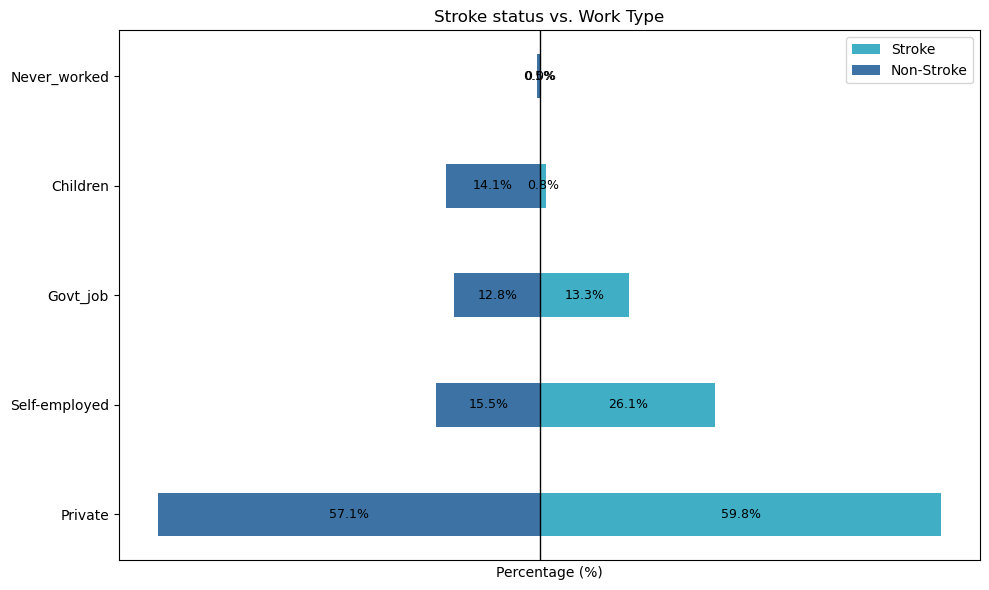

In [ ]:


# Labels
labels = ["Private", "Self-employed", "Govt_job", "Children", "Never_worked"]

# Values (percentages)
stroke_means = np.array([
    pri_w_stroke_mean, 
    slf_emp_stroke_mean, 
    gov_job_stroke_mean, 
    chil_stroke_mean, 
    nev_w_stroke_mean
])  # Stroke group

non_stroke_means = np.array([
    pri_w_no_stroke_mean, 
    slf_emp_no_stroke_mean, 
    gov_job_no_stroke_mean, 
    chil_no_stroke_mean, 
    nev_w_no_stroke_mean
])  # Non-Stroke group

y_pos = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(10, 6))

bar_height = 0.4  # thickness of bars

# Plot Stroke (right side, positive values)
bars_stroke = ax.barh(y_pos, stroke_means, 
                      height=bar_height, color="#40aec4", label="Stroke", align="center")

# Plot Non-Stroke (left side, negative values for plotting)
bars_non_stroke = ax.barh(y_pos, -non_stroke_means, 
                          height=bar_height, color="#3c73a4", label="Non-Stroke", align="center")

# Add labels inside bars
for bar in bars_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=9)

for bar in bars_non_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=9)

# Formatting
ax.set_xticks([])
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.set_xlabel("Percentage (%)")
ax.set_title("Stroke status vs. Work Type")
ax.axvline(0, color="black", linewidth=1)  # center line
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()


## Residence Type

In [ ]:
stroke["residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [ ]:
## Residence Type vrs Stroke Status:


# Step 1: Counts
stroke_yes_total = (dem_var_df ['stroke'] == 1).sum()
stroke_no_total = (dem_var_df ['stroke'] == 0).sum()

# Within stroke=1
urb_stroke = ((dem_var_df['stroke'] == 1) & (dem_var_df['residence_type'] == 'Urban')).sum()
rur_stroke  = ((dem_var_df['stroke'] == 1) & (dem_var_df['residence_type'] == 'Rural')).sum()

# Within stroke=0
urb_no_stroke = ((dem_var_df['stroke'] == 0) & (dem_var_df['residence_type'] == 'Urban')).sum()
rur_no_stroke  = ((dem_var_df['stroke'] == 0) & (dem_var_df['residence_type'] == 'Rural')).sum()


# Calculate the mean: 
# Within stroke=1
urb_stroke_mean = (urb_stroke / stroke_yes_total)*100
rur_stroke_mean  = (rur_stroke / stroke_yes_total)*100

# Within stroke=0
urb_no_stroke_mean = (rur_no_stroke / stroke_no_total)*100
urb_no_stroke_mean  = (rur_no_stroke / stroke_no_total)*100

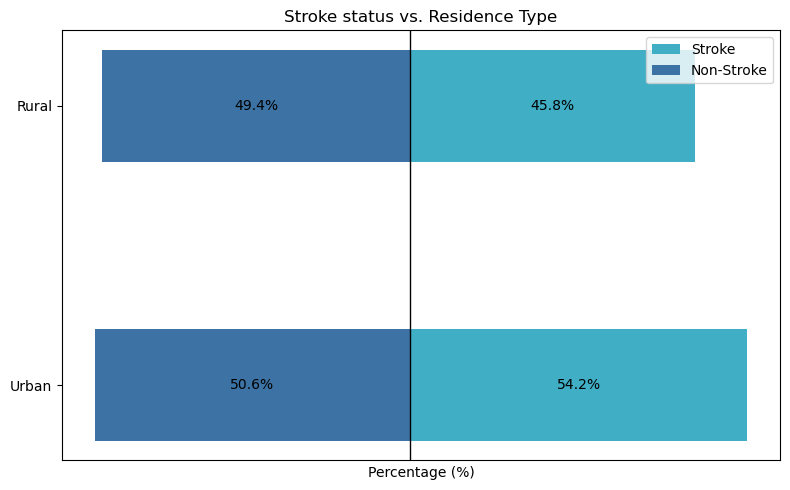

In [ ]:

# Step 1: Counts
stroke_yes_total = (dem_var_df['stroke'] == 1).sum()
stroke_no_total  = (dem_var_df['stroke'] == 0).sum()

# Within stroke=1
urb_stroke = ((dem_var_df['stroke'] == 1) & (dem_var_df['residence_type'] == 'Urban')).sum()
rur_stroke = ((dem_var_df['stroke'] == 1) & (dem_var_df['residence_type'] == 'Rural')).sum()

# Within stroke=0
urb_no_stroke = ((dem_var_df['stroke'] == 0) & (dem_var_df['residence_type'] == 'Urban')).sum()
rur_no_stroke = ((dem_var_df['stroke'] == 0) & (dem_var_df['residence_type'] == 'Rural')).sum()

# Calculate the mean: 
# Within stroke=1
urb_stroke_mean = (urb_stroke / stroke_yes_total) * 100
rur_stroke_mean = (rur_stroke / stroke_yes_total) * 100

# Within stroke=0
urb_no_stroke_mean = (urb_no_stroke / stroke_no_total) * 100
rur_no_stroke_mean = (rur_no_stroke / stroke_no_total) * 100

# Labels
labels = ["Urban", "Rural"]

# Values (percentages)
stroke_means = np.array([urb_stroke_mean, rur_stroke_mean])           # Stroke group
non_stroke_means = np.array([urb_no_stroke_mean, rur_no_stroke_mean]) # Non-Stroke group

y_pos = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(8, 5))

bar_height = 0.4  # thickness of bars

# Plot Stroke (right side, positive values)
bars_stroke = ax.barh(y_pos, stroke_means, 
                      height=bar_height, color="#40aec4", label="Stroke", align="center")

# Plot Non-Stroke (left side, negative values for plotting)
bars_non_stroke = ax.barh(y_pos, -non_stroke_means, 
                          height=bar_height, color="#3c73a4", label="Non-Stroke", align="center")

# Add labels inside bars
for bar in bars_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=10)

for bar in bars_non_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=10)

# Formatting
ax.set_xticks([])
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.set_xlabel("Percentage (%)")
ax.set_title("Stroke status vs. Residence Type")
ax.axvline(0, color="black", linewidth=1)  # center line
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()


## How calculate the statistical diference?

In [ ]:

# Número de pacientes con ever_married == 'No'
no_count = (stroke['ever_married'] == 'Yes').sum()

# Total de pacientes con valor en la columna ever_married
total_count = stroke['ever_married'].notna().sum()

# Media (porcentaje)
married_mean = (no_count / total_count) * 100

print(f"Percentage of patients never married: {married_mean:.1f}%")


Percentage of patients never married: 65.6%


In [ ]:

# Número de pacientes con ever_married == 'No'
no_count = (stroke['ever_married'] == 'Yes').sum()

# Total de pacientes con valor en la columna ever_married
total_count = stroke['ever_married'].notna().sum()

# Media (porcentaje)
married_mean = (no_count / total_count) * 100

print(f"Percentage of patients never married: {married_mean:.1f}%")

Percentage of patients never married: 65.6%


In [ ]:
# Número de pacientes per gender == 'No'
no_count = (with_stroke['gender'] == 'Female').sum()

# Total de pacientes con valor en la columna ever_married
total_count = with_stroke['gender'].notna().sum()

# Media (porcentaje)
married_mean = (no_count / total_count) * 100

print(f"Percentage of patients per gender: {married_mean:.1f}%")



Percentage of patients per gender: 56.6%


In [ ]:
# Contar personas con edad >= 57
over_equal_57_count = (stroke_copy['age'] < 57).sum()

# Contar total de personas con edad registrada
total_count = stroke_copy['age'].notna().sum()

# Calcular porcentaje
over_equal_57_pct = (over_equal_57_count / total_count) * 100

print(f"Percentage of people aged 57 or older: {over_equal_57_pct:.1f}%")


Percentage of people aged 57 or older: 68.3%


- Glucose average: 
	- min value is 55, max value is 271, we can’t take the mean, 
	- we could separated in groups: to take in consideracion, aleatory glucose test  in value more than 200 mg/dl is diagnosis of Diabetes, therefore it is other comorbidity (we need to consider that in the analysis, it is another risk factor, sometimes patients arrive ‘without chronic diseases’ but they have it underdiagnosticated several years ago
	-  I suggest this groups according with the American society of diabetes:  
		- 140 mg/dl or less (use to be a normal value)
		- 141 to 199 mg/dl  (prediabetes or oral glucose intolerance)
		- More than 200 mg/dl Diabetes.


- BMI: min value 10.3 and max value 97.6
	- We can use de BMI classification from the CDC: 
		- <18.5: Underweight
		- 18.5>25 Healthy Weight
		- 25>=30: Overweight
		- >= 30 Obesity

# Stroke vrs comorbilities: HTA and HD Comparative graphics with and without stroke

- Columns of interesr stroke, hypertension and heart_disease 

In [ ]:
# df copy to graph comorbilities in patients with and without stroke: HTA and HD
comorb_df = stroke[['hypertension','heart_disease','stroke']].copy()
comorb_df.head()


,hypertension,heart_disease,stroke
0,0,1,1
1,0,0,1
2,0,1,1
3,0,0,1
4,1,0,1


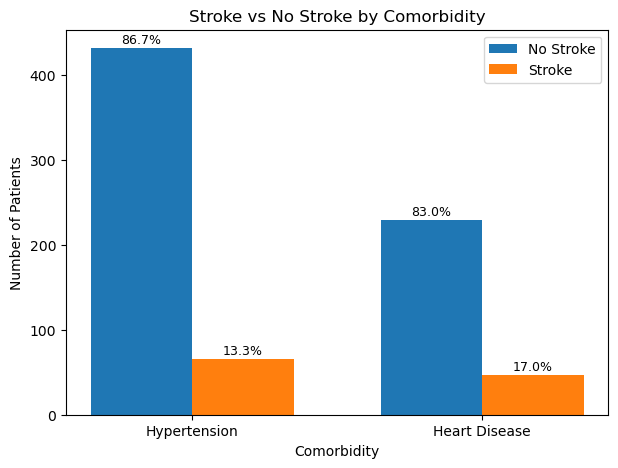

In [ ]:
#Graphic: Patients with stroke and HTA vrs patients without stroke and HTA, 
# Patients with stroke and hear disease vrs patients without stroke and Heard disease, 

# Counts for hypertension
hta_stroke = ((risk_f_df['stroke'] == 1) & (comorb_df['hypertension'] == 1)).sum()
hta_no_stroke = ((comorb_df['stroke'] == 0) & (comorb_df['hypertension'] == 1)).sum()

# Counts for heart disease
hd_stroke = ((comorb_df['stroke'] == 1) & (comorb_df['heart_disease'] == 1)).sum()
hd_no_stroke = ((comorb_df['stroke'] == 0) & (comorb_df['heart_disease'] == 1)).sum()

# Organize data for plotting
labels = ['Hypertension', 'Heart Disease']
stroke_counts = [hta_stroke, hd_stroke]
no_stroke_counts = [hta_no_stroke, hd_no_stroke]

x = np.arange(len(labels))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(7,5))

# Bars
bars_no = ax.bar(x, no_stroke_counts, width=bar_width, label='No Stroke')
bars_yes = ax.bar(x + bar_width, stroke_counts, width=bar_width, label='Stroke')

# Add percentage labels above each bar
for i in range(len(labels)):
    total = no_stroke_counts[i] + stroke_counts[i]
    
    # No Stroke bar
    pct_no = (no_stroke_counts[i] / total) * 100 if total > 0 else 0
    ax.text(
        bars_no[i].get_x() + bars_no[i].get_width()/2,
        bars_no[i].get_height() + 2,
        f"{pct_no:.1f}%",
        ha='center', va='bottom', fontsize=9
    )
    
    # Stroke bar
    pct_yes = (stroke_counts[i] / total) * 100 if total > 0 else 0
    ax.text(
        bars_yes[i].get_x() + bars_yes[i].get_width()/2,
        bars_yes[i].get_height() + 2,
        f"{pct_yes:.1f}%",
        ha='center', va='bottom', fontsize=9
    )

# Labels and formatting
ax.set_xlabel("Comorbidity")
ax.set_ylabel("Number of Patients")
ax.set_title("Stroke vs No Stroke by Comorbidity")
ax.set_xticks(x + bar_width/2)
ax.set_xticklabels(labels)
ax.legend()

plt.show()




# Stroke vrs comorbility

In the observations with HTA, 13.3% had a stroke
In the observtions with Heart disease, 17% had stroke. 

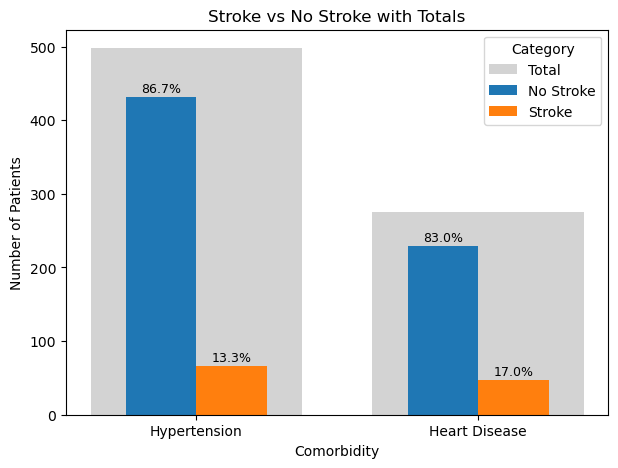

In [ ]:
#Graphic: Patients with stroke and HTA vrs patients without stroke and HTA, 
# Patients with stroke and hear disease vrs patients without stroke and Heard disease, 
# In gray # of patients with stroke and without HTA, and # of patients without stroke, without HTA

# Step 1: Build counts by comorbidity and stroke status
counts = {
    'Hypertension': [
        ((comorb_df['stroke'] == 0) & (comorb_df['hypertension'] == 1)).sum(),  # no stroke
        ((comorb_df['stroke'] == 1) & (comorb_df['hypertension'] == 1)).sum()   # stroke
    ],
    'Heart Disease': [
        ((comorb_df['stroke'] == 0) & (comorb_df['heart_disease'] == 1)).sum(),
        ((comorb_df['stroke'] == 1) & (comorb_df['heart_disease'] == 1)).sum()
    ]
}

# Step 2: Convert to DataFrame for plotting
pivot_df = pd.DataFrame(counts, index=['No Stroke','Stroke']).T

# Add totals column
pivot_df['Total'] = pivot_df.sum(axis=1)

# Step 3: Plot grouped bars with totals
fig, ax = plt.subplots(figsize=(7,5))
bar_width = 0.25
x = np.arange(len(pivot_df.index))

# Grey bars for totals
ax.bar(x, pivot_df['Total'], width=bar_width*3, color='lightgrey', zorder=0, label='Total')

# Bars for stroke categories + percentages
for i, sub_cat in enumerate(['No Stroke','Stroke']):
    values = pivot_df[sub_cat]
    bars = ax.bar(x + (i-0.5)*bar_width, values, width=bar_width, label=sub_cat, zorder=1)
    
    # Add percentage labels above each bar
    for j, bar in enumerate(bars):
        total = pivot_df['Total'].iloc[j]
        pct = (values.iloc[j] / total) * 100 if total > 0 else 0
        ax.text(
            bar.get_x() + bar.get_width()/2, 
            bar.get_height() + 2,   # slightly above the bar
            f"{pct:.1f}%", 
            ha='center', va='bottom', fontsize=9, color='black'
        )

# Labels and formatting
ax.set_xlabel("Comorbidity")
ax.set_ylabel("Number of Patients")
ax.set_title("Stroke vs No Stroke with Totals")
ax.set_xticks(x)
ax.set_xticklabels(pivot_df.index)
ax.legend(title="Category")

plt.show()



# In the last grhapic: 
- Gray: total patient with comorbility: HTA or Heart Disease
- Blue: from patients with HTA or HD # of patientes without strok
- Orange: from patients with HTA or HD # of patientes with strok

- From patienes with HTA, 13.3% had a stroke and 86.7% not.
- From Patientes with heart disease: 17% had a stroke and 83% not. 

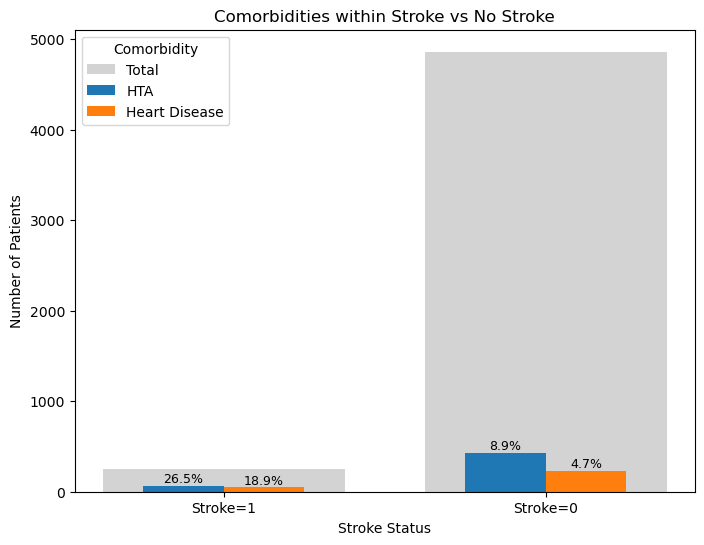

In [ ]:
# Comparation ptes with and without stroke, vrs how many have comorbilities


# Step 1: Counts
stroke_yes_total = (comorb_df['stroke'] == 1).sum()
stroke_no_total = (comorb_df['stroke'] == 0).sum()

# Within stroke=1
hta_stroke = ((comorb_df['stroke'] == 1) & (comorb_df['hypertension'] == 1)).sum()
hd_stroke  = ((comorb_df['stroke'] == 1) & (comorb_df['heart_disease'] == 1)).sum()

# Within stroke=0
hta_no_stroke = ((comorb_df['stroke'] == 0) & (comorb_df['hypertension'] == 1)).sum()
hd_no_stroke  = ((comorb_df['stroke'] == 0) & (comorb_df['heart_disease'] == 1)).sum()

# Step 2: Build DataFrame
data = {
    'Stroke=1': {'HTA': hta_stroke, 'Heart Disease': hd_stroke, 'Total': stroke_yes_total},
    'Stroke=0': {'HTA': hta_no_stroke, 'Heart Disease': hd_no_stroke, 'Total': stroke_no_total}
}
pivot_df = pd.DataFrame(data)

# Step 3: Plot
fig, ax = plt.subplots(figsize=(8,6))
bar_width = 0.25
x = np.arange(len(pivot_df.columns))

# Grey bars for totals
ax.bar(x, pivot_df.loc['Total'], width=bar_width*3, color='lightgrey', zorder=0, label='Total')

# Bars for HTA and Heart Disease
for i, sub_cat in enumerate(['HTA','Heart Disease']):
    values = pivot_df.loc[sub_cat]
    bars = ax.bar(x + (i-0.5)*bar_width, values, width=bar_width, label=sub_cat, zorder=1)
    
    # Add percentage labels
    for j, bar in enumerate(bars):
        total = pivot_df.loc['Total'].iloc[j]
        pct = (values.iloc[j] / total) * 100 if total > 0 else 0
        ax.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height() + 2,
            f"{pct:.1f}%",
            ha='center', va='bottom', fontsize=9, color='black'
        )

# Labels and formatting
ax.set_xlabel("Stroke Status")
ax.set_ylabel("Number of Patients")
ax.set_title("Comorbidities within Stroke vs No Stroke")
ax.set_xticks(x)
ax.set_xticklabels(pivot_df.columns)
ax.legend(title="Comorbidity")

plt.show()

 




# In the gray column: total patientes with and without stroke. 
We cansee thaat comparing patients whit stroke, and observations without stroke, the % of patients with stroke that has HTA are bigger, and the % of patientes with HD are bigger as well, therefore, there are a statistical diference.
- 26% of patients with stroke has HTA vrs 8,9% whitout stroke.
- 18.9 % of patients with stroke has HD vrs 4.7% patienes without Stroke

## tornado chart with matplotlib 

In [ ]:
## Means HTA and HD

# Step 1: Counts
stroke_yes_total = (comorb_df['stroke'] == 1).sum()
stroke_no_total = (comorb_df['stroke'] == 0).sum()

# Within stroke=1
hta_stroke = ((comorb_df['stroke'] == 1) & (comorb_df['hypertension'] == 1)).sum()
hd_stroke  = ((comorb_df['stroke'] == 1) & (comorb_df['heart_disease'] == 1)).sum()

# Within stroke=0
hta_no_stroke = ((comorb_df['stroke'] == 0) & (comorb_df['hypertension'] == 1)).sum()
hd_no_stroke  = ((comorb_df['stroke'] == 0) & (comorb_df['heart_disease'] == 1)).sum()


# Calculate the mean: 
# Within stroke=1
hta_stroke_mean = (hta_stroke / stroke_yes_total)*100
hd_stroke_mean  = (hd_stroke / stroke_yes_total)*100

# Within stroke=0
hta_no_stroke_mean = (hta_no_stroke / stroke_no_total)*100
hd_no_stroke_mean  = (hd_no_stroke / stroke_no_total)*100



In [ ]:
print("hta_no_stroke_mean:", hta_no_stroke_mean)
print("hd_no_stroke_mean:", hd_no_stroke_mean)
print("hta_stroke_mean:", hta_stroke_mean)
print("hd_stroke_mean:", hd_stroke_mean)

hta_no_stroke_mean: 8.887060275663444
hd_no_stroke_mean: 4.710964822053076
hta_stroke_mean: 26.506024096385545
hd_stroke_mean: 18.87550200803213


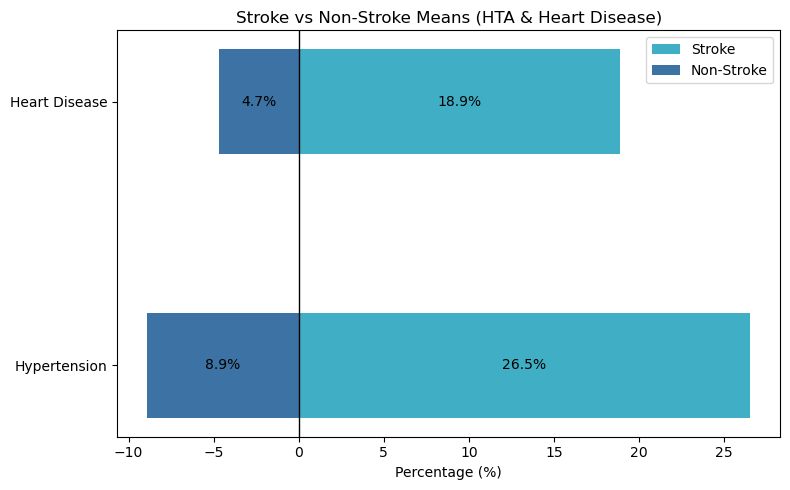

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Labels
labels = ["Hypertension", "Heart Disease"]

# Values (percentages)
stroke_means = np.array([hta_stroke_mean, hd_stroke_mean])           # Stroke group
non_stroke_means = np.array([hta_no_stroke_mean, hd_no_stroke_mean]) # Non-Stroke group

y_pos = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(8, 5))

bar_height = 0.4  # thickness of bars

# Plot Stroke (right side, positive values)
bars_stroke = ax.barh(y_pos, stroke_means, 
                      height=bar_height, color="#40aec4", label="Stroke", align="center")

# Plot Non-Stroke (left side, but values shifted to negative for plotting)
bars_non_stroke = ax.barh(y_pos, -non_stroke_means, 
                          height=bar_height, color="#3c73a4", label="Non-Stroke", align="center")

# Add labels inside bars
for bar in bars_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=10)

for bar in bars_non_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=10)

# Formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.set_xlabel("Percentage (%)")
ax.set_title("Stroke vs Non-Stroke Means (HTA & Heart Disease)")
ax.axvline(0, color="black", linewidth=1)  # center line
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()


# Stroke vrs risk factors: smoke, BMI and Glucose level graphics with and without stroke


In [ ]:
# df copy to graph risk factors in patients with and without stroke: smoke, BMI and Glucose

risk_f_df = stroke[['avg_glucose_level'	, 'bmi', 'smoking_status', 'stroke']].copy()
risk_f_df.head()

,avg_glucose_level,bmi,smoking_status,stroke
0,228.69,36.6,formerly smoked,1
1,202.21,NaN,never smoked,1
2,105.92,32.5,never smoked,1
3,171.23,34.4,smokes,1
4,174.12,24.0,never smoked,1


## BMI Categories

In [ ]:

# Define the bins (boundaries) of x-axis categories
bins = [ 0, 18.5, 25, 30, float('inf')]

# Define the labels for each bin
labels = [ 'Underweight','Healthy Weight', 'Overweight', 'Obesity']

# Create a new column for BMI category type
risk_f_df['bmi_category'] = pd.cut(
    risk_f_df['bmi'],
      bins=bins, 
      labels=labels, 
      right=False)

In [ ]:
print (risk_f_df['bmi_category'].unique())

['Obesity', NaN, 'Healthy Weight', 'Overweight', 'Underweight']
Categories (4, object): ['Underweight' < 'Healthy Weight' < 'Overweight' < 'Obesity']


In [ ]:
print(risk_f_df['bmi'].isna().sum())

201


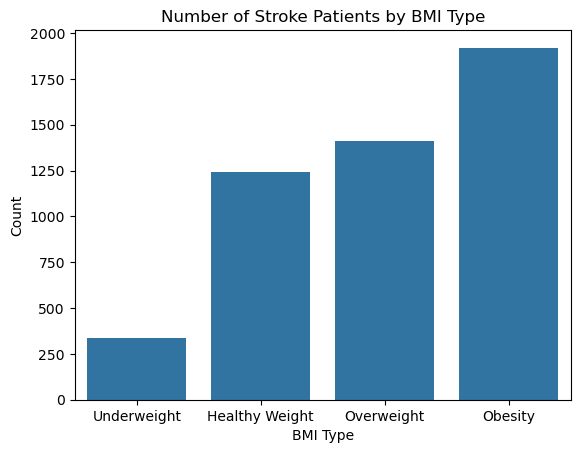

In [ ]:
# Bar Plot for Count of patients by BMI (categories)
sns.countplot(data=risk_f_df, x='bmi_category', order=labels)
plt.title('Number of Stroke Patients by BMI Type')
plt.xlabel('BMI Type')
plt.ylabel('Count')
plt.show()

## Ojo. Pte imputar BMI NAN

In [ ]:
## Means Overweight and Obesity vrs stroke and non stroke


# Step 1: Counts Stroke and non stroke
stroke_yes_total = (risk_f_df['stroke'] == 1).sum()
stroke_no_total = (risk_f_df['stroke'] == 0).sum()

# Within stroke=1
ow_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['bmi_category'] == 'Overweight')).sum()
ob_stroke  = ((risk_f_df['stroke'] == 1) & (risk_f_df['bmi_category'] == 'Obesity')).sum()
hw_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['bmi_category'] == 'Healthy Weight')).sum()
uw_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['bmi_category'] == 'Underweight')).sum()

# Within stroke=0
ow_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['bmi_category'] == 'Overweight')).sum()
ob_no_stroke  = ((risk_f_df['stroke'] == 0) & (risk_f_df['bmi_category'] == 'Obesity')).sum()
hw_no_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['bmi_category'] == 'Healthy Weight')).sum()
uw_no_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['bmi_category'] == 'Underweight')).sum()

# Calculate the mean: 
# Within stroke=1
ow_stroke_mean = (ow_stroke / stroke_yes_total)*100
ob_stroke_mean  = (ob_stroke / stroke_yes_total)*100
hw_stroke_mean  = (hw_stroke / stroke_yes_total)*100
uw_stroke_mean  = (uw_stroke / stroke_yes_total)*100

# Within stroke=0
ow_no_stroke_mean = (ow_no_stroke / stroke_no_total)*100
ob_no_stroke_mean  = (ob_no_stroke / stroke_no_total)*100
hw_no_stroke_mean  = (hw_no_stroke / stroke_no_total)*100
uw_no_stroke_mean  = (uw_no_stroke / stroke_no_total)*100

In [ ]:
print("ow_no_stroke_mean:", ow_no_stroke_mean) # % patients with overweight and non stroke
print("ob_no_stroke_mean:", ob_no_stroke_mean) # % patients with Obesity and non stroke
print("hw_no_stroke_mean:", hw_no_stroke_mean) # % patients with healthy weight and non stroke
print("uw_no_stroke_mean:", uw_no_stroke_mean) # % patients with underweight and non stroke


print("ow_stroke_mean:", ob_stroke_mean) # % patients with Obesity  and  stroke
print("ob_stroke_mean:", ob_stroke_mean) # % patients with Obesity  and  stroke
print("hw_stroke_mean:", hw_stroke_mean) ## % patients with healthy weight and  stroke
print("uw_stroke_mean:", uw_stroke_mean) # % patients with underweight  and  stroke

ow_no_stroke_mean: 27.442912980868133
ob_no_stroke_mean: 37.481999588562026
hw_no_stroke_mean: 0.720016457519029
uw_no_stroke_mean: 0.02057189878625797
ow_stroke_mean: 39.3574297188755
ob_stroke_mean: 39.3574297188755
hw_stroke_mean: 14.056224899598394
uw_stroke_mean: 0.4016064257028112


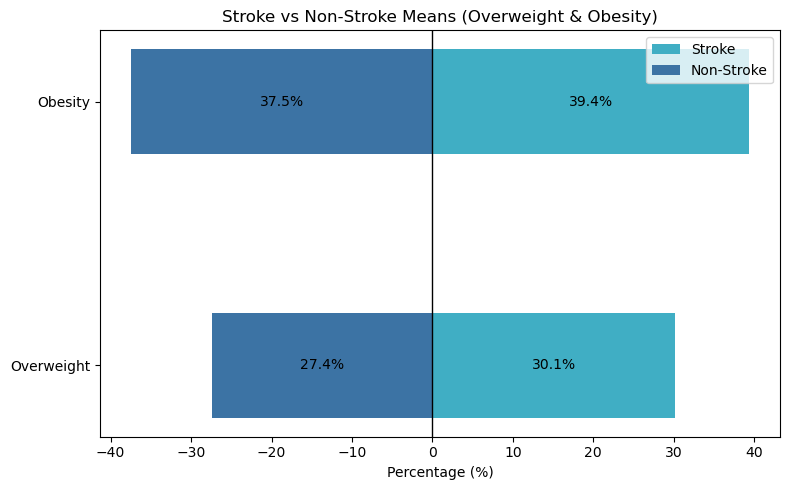

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Labels
labels = ["Overweight", "Obesity"]

# Values (percentages)
stroke_means = np.array([ow_stroke_mean, ob_stroke_mean])           # Stroke group
non_stroke_means = np.array([ow_no_stroke_mean, ob_no_stroke_mean]) # Non-Stroke group

y_pos = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(8, 5))

bar_height = 0.4  # thickness of bars

# Plot Stroke (right side, positive values)
bars_stroke = ax.barh(y_pos, stroke_means, 
                      height=bar_height, color="#40aec4", label="Stroke", align="center")

# Plot Non-Stroke (left side, values shifted to negative for plotting)
bars_non_stroke = ax.barh(y_pos, -non_stroke_means, 
                          height=bar_height, color="#3c73a4", label="Non-Stroke", align="center")

# Add labels inside bars
for bar in bars_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=10)

for bar in bars_non_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=10)

# Formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.set_xlabel("Percentage (%)")
ax.set_title("Stroke vs Non-Stroke Means (Overweight & Obesity)")
ax.axvline(0, color="black", linewidth=1)  # center line
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()


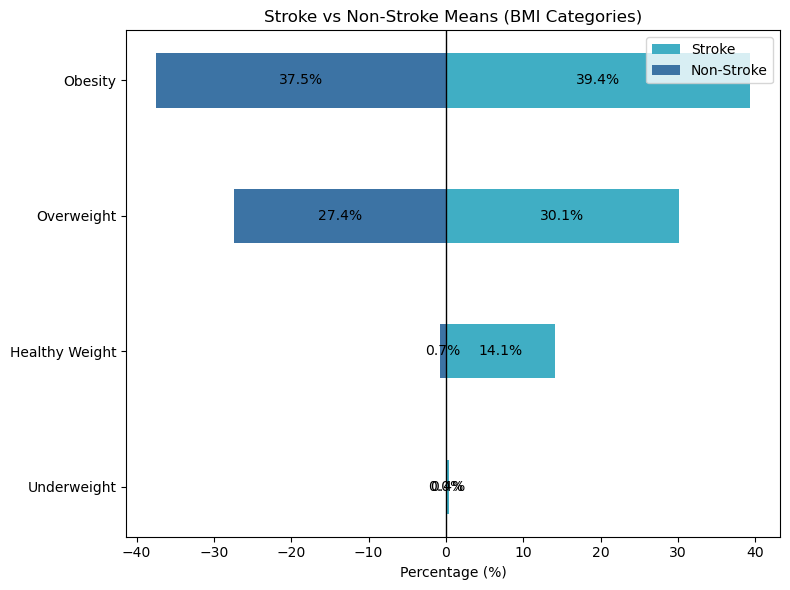

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Labels
labels = ["Underweight", "Healthy Weight", "Overweight", "Obesity"]

# Values (percentages)
stroke_means = np.array([uw_stroke_mean, hw_stroke_mean, ow_stroke_mean, ob_stroke_mean])           # Stroke group
non_stroke_means = np.array([uw_no_stroke_mean, hw_no_stroke_mean, ow_no_stroke_mean, ob_no_stroke_mean]) # Non-Stroke group

y_pos = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(8, 6))

bar_height = 0.4  # thickness of bars

# Plot Stroke (right side, positive values)
bars_stroke = ax.barh(y_pos, stroke_means, 
                      height=bar_height, color="#40aec4", label="Stroke", align="center")

# Plot Non-Stroke (left side, values shifted to negative for plotting)
bars_non_stroke = ax.barh(y_pos, -non_stroke_means, 
                          height=bar_height, color="#3c73a4", label="Non-Stroke", align="center")

# Add labels inside bars
for bar in bars_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=10)

for bar in bars_non_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=10)

# Formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.set_xlabel("Percentage (%)")
ax.set_title("Stroke vs Non-Stroke Means (BMI Categories)")
ax.axvline(0, color="black", linewidth=1)  # center line
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()


# Smoke Categories

In [ ]:
print((risk_f_df['smoking_status'] == 'Unknown').sum())

1544


In [ ]:
print (risk_f_df['smoking_status'].unique())

['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [ ]:
## Means smoking status vrs stroke and non stroke


# Step 1: Counts Stroke and non stroke
stroke_yes_total = (risk_f_df['stroke'] == 1).sum()
stroke_no_total = (risk_f_df['stroke'] == 0).sum()

# Within stroke=1
f_smk_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['smoking_status'] == 'formerly smoked')).sum()
smk_stroke  = ((risk_f_df['stroke'] == 1) & (risk_f_df['smoking_status'] == 'smoked')).sum()
n_smk_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['smoking_status'] == 'never smoked')).sum()
unk_smk_stroke = ((risk_f_df['stroke'] == 1) & (risk_f_df['smoking_status'] == 'Unknown')).sum()

# Within stroke=0
f_smk_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['smoking_status'] == 'formerly smoked')).sum()
smk_no_stroke  = ((risk_f_df['stroke'] == 0) & (risk_f_df['smoking_status'] == 'smoked')).sum()
n_smk_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['smoking_status'] == 'never somoked')).sum()
unk_smk_no_stroke = ((risk_f_df['stroke'] == 0) & (risk_f_df['smoking_status'] == 'Unknown')).sum()

# Calculate the mean: 
# Within stroke=1
f_smk_stroke_mean = (f_smk_stroke / stroke_yes_total)*100
smk_stroke_mean  = (smk_stroke / stroke_yes_total)*100
n_smk_stroke_mean  = (n_smk_stroke / stroke_yes_total)*100
unk_smk_stroke_mean  = (unk_smk_stroke / stroke_yes_total)*100

# Within stroke=0
f_smk_no_stroke_mean = (f_smk_no_stroke / stroke_no_total)*100
smk_no_stroke_mean  = (smk_no_stroke / stroke_no_total)*100
n_smk_no_stroke_mean  = (n_smk_no_stroke / stroke_no_total)*100
unk_smk_no_stroke_mean  = (unk_smk_no_stroke / stroke_no_total)*100

In [ ]:
print("f_smk_no_stroke_mean:", f_smk_no_stroke_mean) # % patients with overweight and non stroke
print("smk_no_stroke_mean:", smk_no_stroke_mean) # % patients with Obesity and non stroke
print("n_smk_no_stroke_mean:", n_smk_no_stroke_mean) # % patients with Obesity and non stroke
print("unk_smk_no_stroke_mean:", unk_smk_no_stroke_mean) # % patients with Obesity and non stroke


print("f_smk_stroke_mean:", f_smk_stroke_mean) # % patients with Obesity  and  stroke
print("smk_stroke_mean:", smk_stroke_mean) # % patients with Obesity  and  stroke
print("n_smk_stroke_mean:", n_smk_stroke_mean) ## % patients with overweight and  stroke
print("unk_smk_stroke_mean:", unk_smk_stroke_mean) # % patients with Obesity  and  stroke

f_smk_no_stroke_mean: 16.766097510800247
smk_no_stroke_mean: 0.0
n_smk_no_stroke_mean: 0.0
unk_smk_no_stroke_mean: 30.79613248302818
f_smk_stroke_mean: 28.11244979919679
smk_stroke_mean: 0.0
n_smk_stroke_mean: 36.144578313253014
unk_smk_stroke_mean: 18.87550200803213


In [ ]:
print((risk_f_df['smoking_status'] == 'smoked').sum())

0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Labels
labels = ["Formerly Smoked", "Smoked", "Never Smoked", "Unknown"]

# Values (percentages)
stroke_means = np.array([
    f_smk_stroke_mean,
    smk__stroke_mean,
    n_smk_stroke_mean,
    unk_smk_stroke_mean
])  # Stroke group

non_stroke_means = np.array([
    f_smk_no_stroke_mean,
    smk_no_stroke_mean,
    n_smk_no_stroke_mean,
    unk_smk_no_stroke_mean
])  # Non-Stroke group

y_pos = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(8, 6))

bar_height = 0.4  # thickness of bars

# Plot Stroke (right side, positive values)
bars_stroke = ax.barh(y_pos, stroke_means,
                      height=bar_height, color="#40aec4", label="Stroke", align="center")

# Plot Non-Stroke (left side, values shifted to negative for plotting)
bars_non_stroke = ax.barh(y_pos, -non_stroke_means,
                          height=bar_height, color="#3c73a4", label="Non-Stroke", align="center")

# Add labels inside bars
for bar in bars_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=10)

for bar in bars_non_stroke:
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
            f"{abs(width):.1f}%", ha="center", va="center", color="black", fontsize=10)

# Formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.set_xlabel("Percentage (%)")
ax.set_title("Stroke vs Non-Stroke Means (Smoking Status)")
ax.axvline(0, color="black", linewidth=1)  # center line
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()


NameError: name 'smk__stroke_mean' is not defined

# Age: we could observed a increase of stroke incidence after 58 years old with a peak after 78 years  old.
	¿how many people over 58 years old is married? and how many is single?

    Why is important?: 
    - Marital status: --% was married and --% was unmarried, however, --% of stroke observation had more than--years old, therefore, it is an inbalance of categorie and is dificult to make a conclution here. 

## Influence of Age on predictions: Survey value for customer age vrs Customer Age. Distribution. Correlation does not mean causation.
## 


Information value
Modelo de clasificacion para muestras desbalanceadas. 

In [ ]:
# Data exploration with_stroke only

with_stroke = stroke.copy() # Dataset copy of observations with stroke to be used for data correlation. 
with_stroke.drop(['id'], axis=1, inplace=True)
with_stroke=  with_stroke[with_stroke['stroke']==1]
with_stroke

NameError: name 'stroke' is not defined